<h3> Importando as bibliotecas Pandas e SciKit Learn </h3>

In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

<h3>Lendo os dados do modelo - automóveis</h3>

In [12]:
dataFrame = pd.read_excel('data/CO2Emissions.xlsx', sheet_name='Carros')
dataFrame

,Id,EngineSize,Cylinders,FuelConsumption,CO2Emissions
0,1,2.0,4,8.5,196
1,2,2.4,4,9.6,221
2,3,1.5,4,5.9,136
3,4,3.5,6,11.1,255
4,5,3.5,6,10.6,244
5,6,3.5,6,10.0,230
6,7,3.5,6,10.1,232
7,8,3.7,6,11.1,255
8,9,3.7,6,11.6,267


<h3>Excluindo as features que não serão utilizadas</h3>

In [13]:
dataFrame.drop(columns=['Id'], inplace=True)
dataFrame

,EngineSize,Cylinders,FuelConsumption,CO2Emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Text(0.5, 1.02, 'Correlação entre as Variáveis de Motorização')

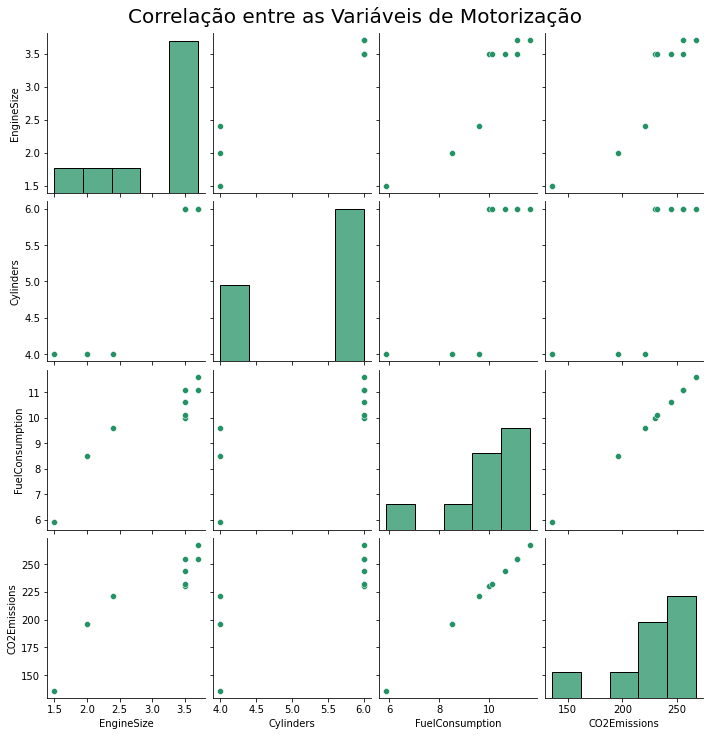

In [14]:
sns.set_palette('summer')
ax = sns.pairplot(data=dataFrame)
ax.fig.suptitle('Correlação entre as Variáveis de Motorização', y=1.02, fontsize=20)

<h3>Verificando a correlação de Pearson das variáveis numéricas</h3>

In [15]:
dataFrame.corr()

,EngineSize,Cylinders,FuelConsumption,CO2Emissions
EngineSize,1.000000,0.957895,0.921087,0.919667
Cylinders,0.957895,1.000000,0.788617,0.786537
FuelConsumption,0.921087,0.788617,1.000000,0.999980
CO2Emissions,0.919667,0.786537,0.999980,1.000000


<h3>Plotando um heatmap da correlação de pearson das variáveis numéricas</h3>


Text(0.5, 1.05, 'Mapa de Correlação de Pearson das Variáveis de Motorização')

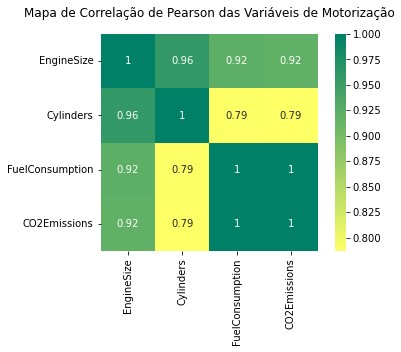

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(dataFrame.corr(), cmap="summer_r", annot=True, square=True, )
ax.set_title('Mapa de Correlação de Pearson das Variáveis de Motorização', fontsize=12, y=1.05)



<h3>Criando um regressor linear com múltiplas variáveis</h3>

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score


var_independentes = dataFrame[['EngineSize', 'Cylinders', 'FuelConsumption']]


X_train, X_test, y_train, y_test = train_test_split(var_independentes, 
                                                    dataFrame.CO2Emissions, test_size=0.33, random_state=1234)

lr = LinearRegression().fit(X=X_train, y=y_train)
print(f'Coeficientes Angulares: {lr.coef_}')
print(f'Coeficiente Linear: {lr.intercept_.round(3)}')



Coeficientes Angulares: [-0.74675325  0.33603896 22.92207792]
Coeficiente Linear: 1.312


<h3>Avaliando o Regressor Linear</h3>

In [18]:
co2_pred = lr.predict(X_test)
co2_real = y_test

dataError= pd.DataFrame(X_test)
dataError['CO2_Real'] = y_test
dataError['CO2_Predict'] = co2_pred
dataError['Error'] = dataError['CO2_Real'] - dataError['CO2_Predict']
dataError.index = range(dataError.shape[0])


print(f'Coeficiente de Determinação :{r2_score(co2_pred, co2_real).round(4)}.')
print(f'Erro médio quadrático : {mean_squared_error(co2_pred, co2_real).round(2)}.')
print(f'Raiz do Erro médio quadrático : {np.sqrt(mean_squared_error(co2_pred, co2_real)).round(2)}.')
print(f'Media da emissão de CO2: {np.round(np.mean(co2_real), 2)}')
print(f'Erro percentual do preditor: {np.round(np.sqrt(mean_squared_error(co2_pred, co2_real)) / np.mean(co2_real) * 100, 2)}%')

dataError

Coeficiente de Determinação :0.9999.
Erro médio quadrático : 0.3.
Raiz do Erro médio quadrático : 0.55.
Media da emissão de CO2: 208.0
Erro percentual do preditor: 0.26%


,EngineSize,Cylinders,FuelConsumption,CO2_Real,CO2_Predict,Error
0,3.7,6,11.6,267,266.461039,0.538961
1,1.5,4,5.9,136,136.775974,-0.775974
2,2.4,4,9.6,221,220.915584,0.084416


<h3>Predizendo a emissão de CO2 de um novo automóvel</h3>
<li>EngineSize:  4.2</li>
<li>Cylinders:  8</li>
<li>FuelConsumption:  13.25</li>

In [19]:
dados_carro_novo = {'EngineSize' : [4.2], 'Cylinders' : [8], 'FuelConsumption': [13.25]}
dados_carro_novo
dataFrame_carro_novo = pd.DataFrame(data = dados_carro_novo)
dataFrame_carro_novo
print(f'Emissão de CO2 do carro projetado: {lr.predict(dataFrame_carro_novo)[0].round(2)}')

Emissão de CO2 do carro projetado: 304.58
